In [29]:
# Ideas and notes: 

# Processing Project

#Find several SAT datasets
#Graph all Curves and find Standard Deviations
#Processing Programs For: 
#- Percentile Calculations
#- Z-score calculations
#- Location on graph
#- Sci Kit transformations
#Self-programmed Linear Regression Algorithm for SAT dataset
#Time permits: 
#Kivy GUI
#Probabilities from Density Curves
#- Density curve for given data
#- Median, mean, skew

In [30]:
#Project Management

#First, I'll attempt to search for three SAT score datasets (two actually, because I already have one to begin with)
#After determining whether or not they are from reliable sources, I'll compile them all into a single csv file. 
#I'll also keep them as separate datasets, so I can compare the distributions later on. 

#After collecting data, I'll create a distribution graph using scikit-learn and possibly other graphing programs. I'll
#create a function which calculates the standard deviation, and I'll use this to find the standard deviation for 
#each individual dataset as well as for the larger, combined dataset. (Assume that for every other test I mention, I
#am applying it to the individual datasets as well as the combined dataset) There will be two California public school
#datasets and one randomly selected dataset from all over the United States (which won't exactly affect the distribution
#of the combined dataset). 
#I'll then create a program which calculates percentiles, z-scores, and shows the user where on the distribution the 
#datapoint (SAT score 200-1600) falls. I will be labeling the graphs to indicate the position of the data point of 
#interest to show where it falls under the normal distribution (https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)
#I'll then explore some sci-kit transformations and attempt to implement them into the program. If time permits, I'll 
#create a Kivy application to view the previously listed programs in a single file.

#Additional Exercises: 

#However, there is one more dataset I'll be experimenting with (if I have time). It contains data from 310 universities
#showing the average SAT score amongst their students. 
#After this (if time), I will learn the techniques behind Linear Regression and add this to the original data processing file 
#(this file) to improve upon the experiment I conducted during the first assignment. 
#Lastly, if there is still ample time, I'll explore density curves and their various uses and possible implementations
#into my program. 

In [31]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import math

In [32]:
#This is just practice for creating dictionaries and representing them as dataframes

lst = {"Names": ["Jonathon", "Nell", "Sarah", "Luis"], "LastNames": ["Tordilla", "Brodkin", "Wilrich", "Mendoza"]}
friend_data = pd.DataFrame(lst)
friend_data

,Names,LastNames
0,Jonathon,Tordilla
1,Nell,Brodkin
2,Sarah,Wilrich
3,Luis,Mendoza


In [33]:
#Here I test the apply function

def returnJ(name):
    if name == "Jonathon":
        return 1
    elif name == "Jonathan":
        return 1
    elif name == "Johnathan":
        return 1
    else:
        return 0
    
test_jonathon = friend_data["Names"].apply(returnJ)
pd.DataFrame(test_jonathon)

,Names
0,1
1,0
2,0
3,0


In [34]:
# Datasets: 

#http://onlinestatbook.com/case_studies/sat.html (Range of selected SAT scores)
#https://data.world/education/california-sat-report-2014-2015 (California 2014-2015)
#https://data.world/education/california-sat-report-2013-2014 (California 2013-2014)

#https://www.kaggle.com/theriley106/university-statistics (College SAT averages)

# I will now attempt to organize each of the datasets into a dataframe, which won't be too difficult hopefully. 
# I do have a json file, but I'll find a way to convert that easily to csv. 

In [35]:
SATUS = pd.read_csv("selectedSATNationwide.csv", sep=",")
SATUS.head(n = 3)
#This dataset is already readable

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40


In [36]:
CollegeSAT = pd.read_csv("CollegeSATAverage.csv", sep=",")
CollegeSAT['sat-avg'].head(n = 10)
#This dataset is also very readable despite, being fed through a json-csv
#converter (http://www.convertcsv.com/json-to-csv.htm)
#As mentioned earlier, I may not work with this dataset

0    1400.0
1    1430.0
2    1450.0
3    1420.0
4    1430.0
5    1460.0
6    1380.0
7    1380.0
8    1380.0
9    1510.0
Name: sat-avg, dtype: float64

In [37]:
CASAT1415 = pd.read_csv("FourFiveSAT.csv", sep=",")
#we have null values, so I'll the drop the rows which contain them
#this is because any time there is a null value for the average math 
#score, it's because the school did not administer the test for some 
#reason
CASAT1415["AvgScrMath"].dropna()
CASAT1415["AvgScrMath"].head(n = 10)

#Initially, I was confused on how exactly to drop the NaN values and such, but I eventually asked for
#help during the following class period. 

0    500
1    536
2    418
3    546
4    387
5    NaN
6    546
7    590
8      *
9    573
Name: AvgScrMath, dtype: object

In [38]:
CASAT1314 = pd.read_csv("ThreeFourSAT.csv", sep=",")
#we have null values again, so I repeat the previous process. 
CASAT1314["AvgScrMath"].head(n = 10)

0    506
1    543
2    429
3    523
4    402
5    NaN
6      *
7    545
8    605
9    NaN
Name: AvgScrMath, dtype: object

In [39]:
#Updated Project Management Plan: 

#So now with these formatted datasets, I can now continue on to visualizing the data as a normal distribution. 

#I plan to do this by first reading an article which shows the viewer how to create a distribution using 
#the mean, standard deviation, and z-scores. All three of these values will be later be computed by functions 
#which will iterate through each of the three datasets. 

#Once values are obtained, they will be placed into their respective columns in a DataFrame. 

#Using pandas and matplotlib, it will then be somewhat straightforward to plot the normal distribution. 

#An additional function to calculate percentiles will then be implemented to the program, and annotations to the 
#graph will be added in order for the user to visualize his/her percentile on the graph itself with arrows and text

#If there is still time, I'll create another normal distribution, but instead for the average SAT composite score
#for 310 colleges in the United States. I might even create an iOS application to view percentiles by inputting 
#scores in my own time. 

In [40]:
#https://www.science-emergence.com/Articles/How-to-plot-a-normal-distribution-with-matplotlib-in-python-/

#using the mean and standard deviation, the built in function scipi.stats.norm.pdf() creates the outputs for a perfect
#normal distribution. However, how am I supposed to create a normal distribution as a varying bar chart? 
#I found another resource here: https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib
#this is perfect, because it formats the data in a curved histogram. 

#This simplifies the process, because numpy calculates the mean and standard deviation, but I'll choose to use my own
#functions which utilize the mathematical definitions of these traits. 

In [41]:
#These transformations allow me to use the mean and standard deviation to plot the normal distribution. 

#Mean and Standard Deviation test - experiment with CollegeSAT
#I wrote these functions from scratch, with assistance from stack overflow for: 
    #sum and len (I forgot these existed somehow)
    #square roots (I didn't import math)

column = CollegeSAT["sat-avg"].head(n = 10)
scoreList = column.tolist()

def formatAvg(lst):
    print("Average: {}".format(sum(lst)/len(lst)))
    #to find the average, I simply take the sum of the list and divide it by the amount of items in the list
    
def avg(lst):
    return (sum(lst)/len(lst))

def formatStanDev(lst):
    average = int(sum(lst)/len(lst))
    print("Average: {}".format(average))
    squaredList = []
    
    for i in scoreList:
        diff = abs(i - average)
        diffSquared = diff * diff
        squaredList.append(diffSquared)
    
    sSquared = sum(squaredList)/len(squaredList)
    s = math.sqrt(sSquared)
    print("Standard Deviation: {}".format(s))
    #this follows the usual standard deviation formula: take the average, find the difference of each datapoint
    #from the average, square each difference and sum them together, divide by the amount of items, and take the
    #square root. 
    
def stanDev(lst):
    average = int(sum(lst)/len(lst))
    squaredList = []
    
    for i in lst:
        diff = abs(i - average)
        diffSquared = diff ** 2
        squaredList.append(diffSquared)
    
    sSquared = sum(squaredList)/len(squaredList)
    s = math.sqrt(sSquared)
    return s

avg(scoreList)

1424.0

In [42]:
stanDev(scoreList)

39.7994974842648

In [43]:
#These functions calculate percentile given your score, or your score given your percentile
#I'll create more functions later which create annotations on graphs using these 

def calScore(perc, lst): 
    lst.sort()
    lstLength = len(lst)
    ind = perc * lstLength
    listIndex = round(ind)
    return lst[listIndex - 1]
    #This calculates the score the test taker received by using the percentile and the specific list. 
    #The function sorts the list, takes the length of the list, and then finds the index by multiplying the
    #desired percentile by the list length. the function returns listIndex - 1 due to the way lists are 
    #formatted, with 0 as the first item, 1 as the second item, and so on. 

def negativeCalScore(perc, lst):
    lst.sort()
    lstLength = len(lst)
    ind = perc * lstLength
    listIndex = round(ind)
    return -(lst[listIndex-1])
    #This function is never used, and it was created because I thought it would enable me to point to a 
    #specific datapoint on a distribution... This will make sense soon, when I explain the distribution graphs. 

def calPerc(score, lst):
    lst.sort()
    lstLength = len(lst)
    if score in lst: 
        ind = lst.index(score)
        perc = ind/lstLength
        return perc
        
    elif score not in lst: 
        lst.append(score)
        lst.sort()
        ind = lst.index(score)
        perc = ind/lstLength
        return perc
    
    #calculating the percentile based on a given score was the opposite process as calculating the score. 
    #I simply used the algebraic relationship between the percentile with the index to find this. If the 
    #score wasn't already in the list of scores, it would add it to the list and proceed with the same process. 

calScore(0.99, scoreList)
calPerc(1600, scoreList)

1.0

In [44]:
#Now I will use the link (https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib)
#to create plots for the individual three datasets, and then I'll create the combined plot, but first I need to 
#place all of the individual math scores into lists which we can easily iterate through. 

#Then, it'll be straightforward to create the distribution and add the calculations for percentiles and calculations.

#At this point, because the scores given are schoolwide averages throughout California, I'm not exactly sure if the 
#curve graphed will even be a normal distribution. However, whatever shape the graph makes, it'll be interesting to 
#view and manipulate

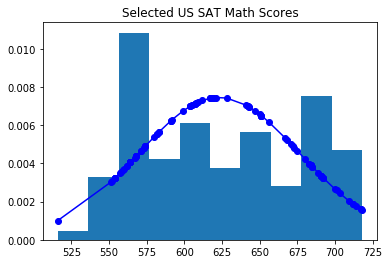

In [45]:
import scipy.stats as stats
import pylab as plt

SATUSList = SATUS['math_SAT'].tolist()
h = sorted(SATUSList)
fit = stats.norm.pdf(h, avg(SATUSList), stanDev(SATUSList))
plt.plot(h, fit, '-bo')
plt.title("Selected US SAT Math Scores")
plt.hist(h, density = True)
plt.show()

#This bit of code takes the list, sorts it, fits it to a normal distribution using the average and standard deviation
#values, and plots it in the form of a histogram as well. 

In [46]:
#Okay, so this shows somewhat of a normal distribution, but it's definitely not what I'm looking for. Most of the 
#scores actually tend to lie around the left corner of the graph, at about 560. Let's see how this compares to 
#the California datasets. 

In [47]:
ThreeFourSAT = CASAT1314['AvgScrMath'].tolist()
FourFiveSAT = CASAT1415['AvgScrMath'].tolist()

In [48]:
ThreeFourSAT = [val for val in ThreeFourSAT if val not in ["*", "NA"]] #list comprehension!
FourFiveSAT = [val for val in FourFiveSAT if val not in ["*", "NA"]]

#I had never seen list comprehension before this class, and I now know that it's very useful. It allowed me to 
#rid my lists of null and undesired values simply by creating a new list without those characters. 

In [49]:
ThreeFourSAT = [val for val in ThreeFourSAT if not pd.isnull(val)]
FourFiveSAT = [val for val in FourFiveSAT if not pd.isnull(val)]

#I repeated this process for null values, using the pd.isnull(val) function. 

In [50]:
for index, item in enumerate(ThreeFourSAT):
    if type(item) == type(""):
        ThreeFourSAT[index] = int(ThreeFourSAT[index])
        
for index, item in enumerate(FourFiveSAT):
    if type(item) == type(""):
        FourFiveSAT[index] = int(FourFiveSAT[index])
    
ThreeFourSAT = [val for val in ThreeFourSAT if not np.isnan(val)]
FourFiveSAT = [val for val in FourFiveSAT if not np.isnan(val)]

#finally, after making sure that every value was some kind of number and that every number was an integer, I was
#able to graph the data.

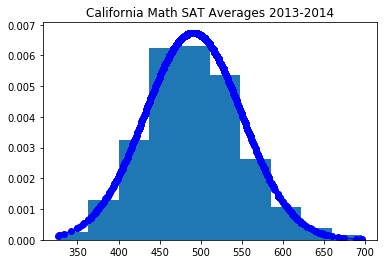

In [51]:
h1 = sorted(ThreeFourSAT)
fit1 = stats.norm.pdf(h1, avg(ThreeFourSAT), stanDev(ThreeFourSAT))
plt.plot(h1, fit1, '-bo')
plt.hist(h1, density=True)
plt.title("California Math SAT Averages 2013-2014")
plt.show()

#The result is a visually-pleasing normal distribution curve for the 2013 and 2014 California SAT data. 

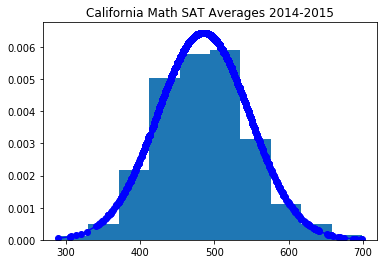

In [52]:
h2 = sorted(FourFiveSAT)
fit2 = stats.norm.pdf(h2, avg(FourFiveSAT), stanDev(FourFiveSAT))
plt.plot(h2, fit2, '-bo')
plt.hist(h2, density=True)
plt.title("California Math SAT Averages 2014-2015")
plt.show()

#The same goes for the 2014 and 2015 data, and this graph is less shifted to the left. 

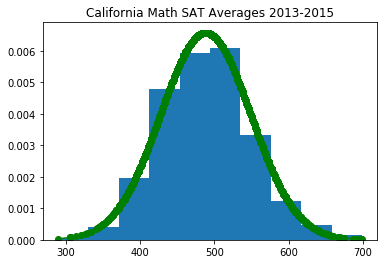

In [53]:
#Now I'll create a combined dataset with both lists

def graphSAT():
    CalSAT = ThreeFourSAT + FourFiveSAT
    h3 = sorted(CalSAT)
    fit3 = stats.norm.pdf(h3, avg(CalSAT), stanDev(CalSAT))
    plt.plot(h3, fit3, '-go')
    plt.hist(h3, density=True)
    plt.title("California Math SAT Averages 2013-2015")
    plt.show()
    
graphSAT()

In [56]:
#h3 is the combined dataset
#Functions: avg, formatAvg, stanDev, formatStanDev, calScore(perc, lst), calPerc(score, lst)

CalSAT = ThreeFourSAT + FourFiveSAT
h3 = sorted(CalSAT)
average = str(avg(h3))
standard = str(stanDev(h3))

print("Average: {}, Standard Deviation: {}".format(average, standard))

Average: 487.9414705882353, Standard Deviation: 60.65747856515594


In [57]:
#calculate the datapoint for the 90th percentile on average
calScore(0.90, CalSAT)

562

In [58]:
#calculate the percentile for a 600 on the math section on average
calPerc(600, CalSAT)

0.9591176470588235

In [59]:
#Now I'm going to try creating another function which annotates the graph showing the position of the score/percentile

def showPerc(perc):
    CalSAT = ThreeFourSAT + FourFiveSAT
    h3 = sorted(CalSAT)
    fit3 = stats.norm.pdf(h3, avg(CalSAT), stanDev(CalSAT))
    plt.plot(h3, fit3, '-go')
    plt.hist(h3, density=True)
    plt.title("California Math SAT Averages 2013-2015")
    
    #arrow from the right
    score = calScore(perc, CalSAT)
    minusScore = score - 1020
    if perc > 0.5:
        plt.arrow(1020, 0 , minusScore, 0.01 - perc/100 + 0.0005, width=0.0006, head_width=0.0012, head_length=30,
                 length_includes_head = True, color="blue")
        
    #This arrow was able to start from the right if the percentile was greater than 0.5. The parameter values 
    #were experimented with for quite a bit, and it took perfecting to actually get the arrow to point exactly at 
    #at the desired datapoint. "0.01 - perc/100 + 0.0005" represents the change in y from (1020, 0) on the graph. 
    #The logic behind this is that 0.01 is the max height, and instead of increasing in height, the curve actually
    #decreases after the local max, as it's concave down. So it decreases in increments of the percentile as it moves
    #to the right. A similar process is completed upon approaching the maximum point, but it involves increasing the
    #change in y in increments of percentile instead. 
    
    #arrow from the left
    else: 
        plt.arrow(0, 0, calScore(perc, CalSAT), perc/100 + 0.0013, width=0.0006, head_width=0.0012, head_length=30,
                 length_includes_head = True, color="red")
        
    SATScore = calScore(perc, CalSAT)
    print("SAT Math Score: {}".format(SATScore))
    
    plt.show()

SAT Math Score: 453


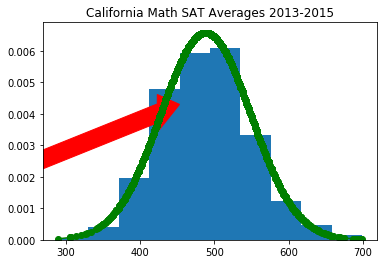

In [60]:
showPerc(0.3)

SAT Math Score: 518


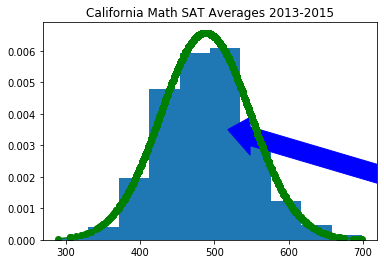

In [61]:
showPerc(0.7)

SAT Math Score: 412


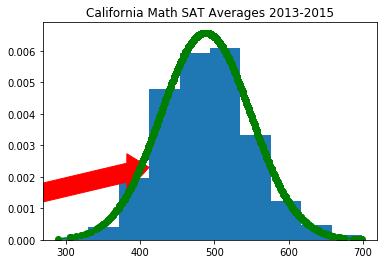

In [62]:
showPerc(0.1)

SAT Math Score: 647


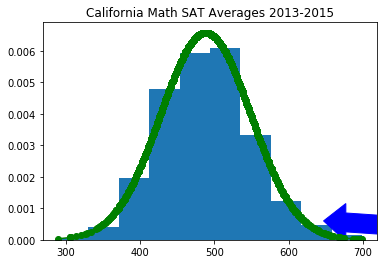

In [63]:
showPerc(0.99)

In [64]:
#And that's my demonstration of the percentile visualization function. 
#In summary: 
#I collected data for SAT scores, using four datasets from data.world, kaggle, and another website. 
#I organized this data in csv files, lists, and dataframes
#I created functions which could perform varrious statistical operations on the lists
#I created functions which made these lists ready for manipulation 
#I created functions which graphed the data as a normal distribution with the help of scipy
#I created functions which pointed out the datapoint which corresponded to the percentile given and displayed the SAT math score

In [65]:
#Reflection: 

#From this project I learned many things about data processing in python and statistics/data representation. 
#I was never very comfortable with working with datasets and dataframes in python and pandas, but now I feel 
#comfortable creating my own lists, dictionaries, dataframes, csv files, graphs, and mathematical functions. 
#My exposure to statistics prior to this class has been very minimal, and I'd like to explore the topics of 
#distributions and density, random variables, confidence intervals, and chi square tests in this class, in the 
#near future. I also hope to work more with graphing in matplotlib as well. 

#Although I previously mentioned I would be working with Kivy, I recently discovered a new incredibly useful 
#application of machine learning and data visualization: trading. As a side project, I will begin research on this
#topic, and I'll eventually upload my findings on this topic to the repository as well.